<a href="https://colab.research.google.com/github/DanielHnjsSnchz/IAA/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Ejercicio 1.- Codifica una función que aplique el algoritmo de aprendizaje del perceptrón, siguiendo las directrices que se explicaron en clase.**


In [ ]:
import numpy as np
def perceptron_learn(X, y, epoche):
  #Inicializar los pesos a 0
  w = [0.0 for i in range(len(X[0]))]
  b = 0.0

  #Entrenamos al modelo
  for epoch in range(epoche):
    for i in range(len(X)):
      #calculamos la salida del algoritmo
      yhat = predict(X[i], w, b)

      #actualizamos los pesos y sesgo
      if yhat != y[i]:
        w = update_weights(w, X[i], y[i], yhat)
        b = update_bias(b, y[i], yhat)
  
  #devolvemos los pesos y sesgos como resultado final
  return w, b

def predict(X, w, b):
  #calculamos salida del algoritmo perceptron
  yhat = b
  for i in range(len(X)):
    yhat += X[i] * w[i]
  #return 1 if yhat>=0 else -1
  return np.sign(yhat)

def update_weights(w, X, y, yhat, learning_rate=0.1):
  #actualizamos los pesos
  for i in range(len(w)):
    w[i] = w[i] + learning_rate * (y - yhat) * X[i]
  return w

def update_bias(b, y, yhat, learning_rate=0.1):
  #actualizamos el sesgo
  b = b + learning_rate * (y - yhat)
  return b

**2.- Desarrolla un programa principal que haga uso de estas dos funciones, y que las aplique sobre el siguiente conjunto de datos**

In [113]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
import numpy as np

def plot_decision_boundary(x1, w,b):
 
    x_min, x_max = x1.min() - 1, x1.max() + 1
    if w[1] != 0:
      weights = -w[0] / w[1]
      line_points = np.linspace(x_min, x_max)
      plt.plot(line_points, weights * line_points - (b / w[1]))


def plot_decision_boundary_alt(X, y, figsize=(8, 5), cmap='Paired'):
    # Set figure size
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Plot data points
    colors = ['r' if label == 0 else 'b' for label in y]
    ax.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap)

    # Set axis limits
    ax.set_xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    ax.set_ylim([np.min(X[:, 1]), np.max(X[:, 1])])

    # Create a meshgrid of points to draw the decision boundary
    xx, yy = np.meshgrid(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100),
                         np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100))
    xy_mesh = np.column_stack((xx.flatten(), yy.flatten()))

    # Predict the class for each meshgrid point and reshape the output
    Z = predict(xy_mesh, w, b)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.2)

    # Add axis labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_title('Decision Boundary')

    # Show the plot
    plt.show()

X = np.array([[1, 0], [0, 2], [1, 1], [1, 2], [1, 3], [2, 2], [2, 3], [3, 2]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

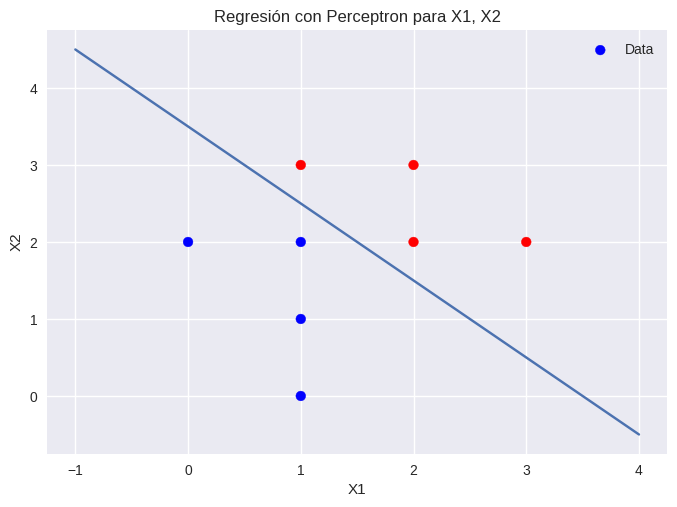

In [114]:
w,b = perceptron_learn(X, y, 1000)

color = ['red' if value == 1 else 'blue' for value in y]


plt.scatter(X[:, 0], X[:, 1], label='Data', marker='o', color=color)
plot_decision_boundary(X,w,b)
#plt.plot(X[0],y,label='Predicción',color='black',linewidth=2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Regresión con Perceptron para X1, X2')
plt.legend()
plt.show()

**3.- Codifica ahora una función que aplique el algoritmo de clasificación de regresión logística, siguiendo también las directrices vistas en clase, y aplícalo al mismo conjunto de datos (umbral 0.5 para clasificación).**

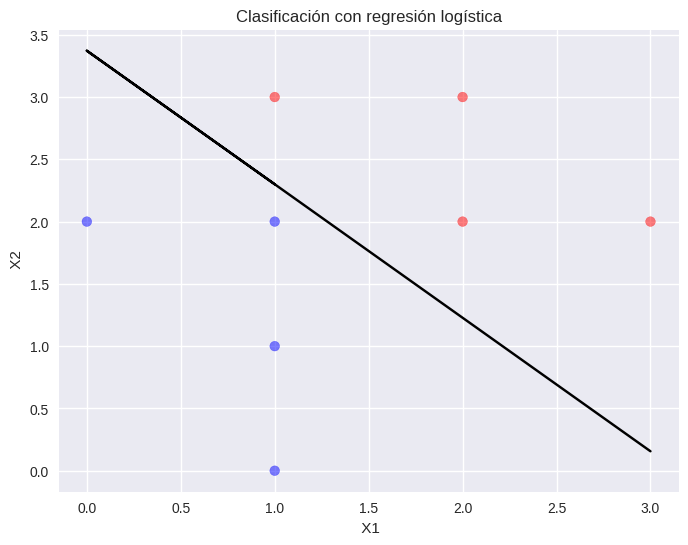

In [112]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Cargar los datos de entrenamiento y prueba desde archivos o de cualquier otra fuente
X = np.array([[1, 0], [0, 2], [1, 1], [1, 2], [1, 3], [2, 2], [2, 3], [3, 2]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
# Crear una instancia del modelo
modelo = LogisticRegression()

modelo.fit(X, y)

# Realizar predicciones en el conjunto de prueba
y_prediccion = modelo.predict(X)

coeficientes = modelo.coef_.ravel()
interseccion = modelo.intercept_

# Calcular la línea de separación
boundary_line = -(interseccion + coeficientes[0] * X[:, 0]) / coeficientes[1]

# Graficar los puntos de datos y la línea de separación

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.5)
plt.plot(X[:, 0], boundary_line, color='black')
plt.xlabel(' X1')
plt.ylabel(' X2')
plt.title('Clasificación con regresión logística')
plt.show()

**4.- Construye un conjunto de funciones que reciban dos vectores (x, y) y que construyan la matriz de confusión para este conjunto de resultados. Construye ahora un conjunto de funciones que reciben esta matriz de confusión (en el formato que hayas definido) y calculen las métricas de calidad que hemos estudiado en clase: exactitud, recall, precisión, F1 y Fb, selectividad y especificidad.**

In [ ]:
def confusion_matrix(x, y):
    """ x: representan los valores verdaderos.
        y: representan las predicciones. """
        
    tp = 0  # Verdaderos positivos
    fn = 0  # Falsos negativos
    fp = 0  # Falsos positivos
    tn = 0  # Verdaderos negativos

    for i in range(len(x)):
        if x[i] == 1 and y[i] == 1:
            tp += 1
        elif x[i] == 1 and y[i] == 0:
            fn += 1
        elif x[i] == 0 and y[i] == 1:
            fp += 1
        else:
            tn += 1

    return [[tp, fn], [fp, tn]]


In [ ]:
def exactitud(matriz_confusion):

    tp = matriz_confusion[0][0]
    fn = matriz_confusion[0][1]
    fp = matriz_confusion[1][0]
    tn = matriz_confusion[1][1]

    return (tp + tn) / (tp + fn + fp + tn)

def recall(matriz_confusion):

    tp = matriz_confusion[0][0]
    fn = matriz_confusion[0][1]

    return tp / (tp + fn)


def precision(matriz_confusion):

    tp = matriz_confusion[0][0]
    fp = matriz_confusion[1][0]

    return tp / (tp + fp)

def f1(matriz_confusion):

    p = precision(matriz_confusion)
    r = recall(matriz_confusion)

    return 2 * (p * r) / (p + r)

def f_beta(matriz_confusion, beta):

    p = precision(matriz_confusion)
    r = recall(matriz_confusion)

    return ((1 + beta) ** 2) * (p * r) / (((beta ** 2) * p) + r)

def especifidad(matriz_confusion):

    fn = matriz_confusion[0][1]
    tn = matriz_confusion[1][1]

    return tn / (fn + tn)

def sensibilidad(matriz_confusion):

    fn = matriz_confusion[0][1]
    tp = matriz_confusion[0][0]

    return tp / (fn + tp)

**5.- Con las funciones desarrolladas en el apartado 4, obtén los resultados de calidad de los clasificadores desarrollados (perceptrón y logística).**

**6.- A continuación, vamos a trabajar con un ejemplo de análisis de sentimientos real. Se trata de determinar si la evaluación que se hace de una película es positiva o negativa.**
Los datos se tomarán de un conjunto de 50.000 revisiones, tomadas de la base de datos IMDB3. Para construir el clasificador, no utilizarás tu propia implementación, sino que utilizarás la que está disponible en Turi Create. 

In [ ]:
import turicreate as tc

data = tc.SFrame.read_csv('reviews.csv')

train_data, test_data = data.random_split(0.8)

model = tc.text_classifier.create(train_data, 'sentiment', features=['review'], max_iterations=10)

evaluacion = model.evaluate(test_data)

nueva_revisiom = tc.SArray(['Esta pelicula es increiblemente buena'])

ModuleNotFoundError: ignored

7. A continuación, evaluarás el modelo que has obtenido en el apartado 6. Puedes
consultar la documentación de la función model para ver cómo hacerlo con Turi Create,
aunque puedes desarrollar tu propio código aplicando el modelo que has obtenido en 6
sobre el conjunto de datos. Una vez obtenidas todas las predicciones, puedes obtener
la matriz de confusión y las métricas que has desarrollado en el apartado 4.


In [ ]:
import turicreate as tc


data = tc.SFrame.read_csv('reviews.csv')

train_data, test_data = data.random_split(0.8)

model = tc.text_classifier.create(train_data, 'sentiment', features=['review'], max_iterations=10)

evaluacion = model.evaluate(test_data)

nueva_revisiom = tc.SArray(['Esta pelicula es increiblemente buena'])

evaluacion = model.evaluate(test_data)
print(evaluacion)

ModuleNotFoundError: ignored

8. Ahora vas a obtener la curva ROC para el modelo desarrollado en el apartado 6.
Recuerda que has de ir modificando el umbral de clasificación y, en cada caso, obtener
las predicciones, la matriz de confusión, la especificidad y la sensibilidad. Dibuja la
gráfica con la curva. 

In [ ]:
import turicreate as tc

data = tc.SFrame.read_csv('reviews.csv')

train_data, test_data = data.random_split(0.8)

model = tc.text_classifier.create(train_data, 'sentiment', features=['review'], max_iterations=10)

evaluacion = model.evaluate(test_data)

nueva_revisiom = tc.SArray(['Esta pelicula es increiblemente buena'])

roc= model.evaluate_roc(test_data)
roc.show()

ModuleNotFoundError: ignored

9. En esta práctica vamos a probar un modelo de red neuronal para llevar a cabo una
tarea de reconocimiento de imágenes, a saber, el reconocimiento de dígitos a partir de
imágenes caligráficas (dataset MNIST). El procedimiento a seguir se ha visto en la clase
de teoría. Procederemos a realizar los siguientes pasos: (a) cargar el dataset, (b)
redimensionarlo para que se ajuste a las entradas de la red y para que la salida sea
categórica (c) Definir la arquitectura de red (784:120relu:64relu:10softmax) (d) compilar
la red y entrenarla.
Intenta jugar con algunos de los hiperparámetros de la red para intentar mejorar la
predicción. Presentarás un informe de los modelos que has probado. Para llevar a cabo
esta evaluación, puede ser interesante que particiones el dataset en training y test.

In [ ]:
import tensorflow as tf
from tensorflow import keras

#cargamos datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#procesamos los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

#definimos modelo de red neuronal
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax')
])


#compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#entrenamos el modeloç
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

#evaluamos el modelo con las pruebas
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precision en el conjunto de prueba:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2602 - accuracy: 0.9255 - val_loss: 0.1394 - val_accuracy: 0.9570
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1153 - accuracy: 0.9654 - val_loss: 0.0979 - val_accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0800 - accuracy: 0.9752 - val_loss: 0.0842 - val_accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0839 - val_accuracy: 0.9745
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9758
Precision en el conjunto de prueba: 0.9757999777793884


10. Para terminar esta práctica, vamos a construir un modelo de red neuronal para llevar
a cabo una tarea de regresión, la que vimos en la práctica anterior. Vamos a ensayar la
siguiente arquitectura de partida para modelar el precio de las viviendas:

• Una capa de entrada de tamaño 38 (el número de columnas del conjunto de datos)
• Una capa oculta de tamaño 128 con una función de activación ReLU y un parámetro de
dropout de 0,2
• Una capa oculta de tamaño 64 con una función de activación ReLU y un parámetro de
dropout de 0,2
• Una capa de salida de tamaño 1 sin función de activación
Para entrenar la red, hay que usar como función de pérdida el error cuadrático medio,
y es recomendable usar el optimizador Adam.
Intenta jugar con los hiperparámetros para obtener el modelo con menor error de
prueba. Puedes hacer dos particiones (train/test) para valorar la calidad de tus
diferentes configuraciones.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

#cargamos datos de los precios de viviendas
data = pd.read_csv('housing_prices.csv')


#dividimos datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2)

#procesamos los datos (separamos la variable objetivo de las demas)
x_train = train_data.drop('SalePrice', axis=1).values
y_train = train_data['SalePrice'].values

x_test = test_data.drop('SalePrice', axis=1).values
y_test = test_data['SalePrice'].values

#definimos el modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(38,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


#compilamos el modelo (especificamos funcion de perdida, optimizador y metricas)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squeared_error', mtrics=['mae'])

#entrenar el modelo
history= model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

#evaluar el modeloç
test_loss, test_mae = model.evaluate(x_test, y_test)
print('Error de prueba:', test_loss)


FileNotFoundError: ignored